# Project- 3  Sonar Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Sonar.csv",names=range(0,61),header=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
df1=pd.read_csv("Sonar.csv",names=range(0,61),header=0)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [5]:
df.shape

(207, 61)

In [6]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [7]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Key Observation:-
    
    1. Possibly there is no outliers present in variables.
    2. Mean is greater than mediaan in many variables so positive skewness present in these variables.
    
    

# EDA

In [9]:
df.iloc[:,-1].unique()

array(['R', 'M'], dtype=object)

In [10]:
df.iloc[:,-1].value_counts()

M    111
R     96
Name: 60, dtype: int64

# DATA VISUALIZATION

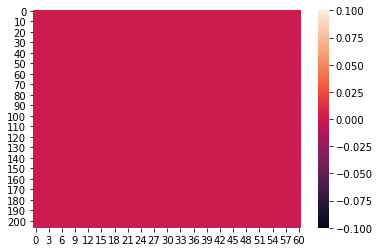

In [11]:
sns.heatmap(df.isnull())

Dataset has no missing value

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       207 non-null    float64
 1   1       207 non-null    float64
 2   2       207 non-null    float64
 3   3       207 non-null    float64
 4   4       207 non-null    float64
 5   5       207 non-null    float64
 6   6       207 non-null    float64
 7   7       207 non-null    float64
 8   8       207 non-null    float64
 9   9       207 non-null    float64
 10  10      207 non-null    float64
 11  11      207 non-null    float64
 12  12      207 non-null    float64
 13  13      207 non-null    float64
 14  14      207 non-null    float64
 15  15      207 non-null    float64
 16  16      207 non-null    float64
 17  17      207 non-null    float64
 18  18      207 non-null    float64
 19  19      207 non-null    float64
 20  20      207 non-null    float64
 21  21      207 non-null    float64
 22  22

# Corelation

In [13]:
dfcor = df.corr()
dfcor

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.255916,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302
1,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.320931,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010
2,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.238392,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256
3,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.177103,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262
4,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.115023,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220
5,0.238824,0.332319,0.346271,0.352901,0.597438,1.000000,0.703624,0.471942,0.329145,0.288639,...,0.172210,0.252509,0.162255,0.164595,0.133351,0.168382,0.163433,0.204027,0.220678,0.178027
6,0.262095,0.279328,0.190628,0.248713,0.334831,0.703624,1.000000,0.675612,0.469490,0.425675,...,0.182929,0.147402,0.047982,0.161645,0.196456,0.171433,0.183382,0.242632,0.183279,0.224536
7,0.356312,0.334747,0.237974,0.248131,0.203590,0.471942,0.675612,1.000000,0.779512,0.652635,...,0.260114,0.221356,0.103418,0.233340,0.240079,0.276214,0.266743,0.287568,0.194209,0.147350
8,0.356822,0.317929,0.253615,0.252048,0.176522,0.329145,0.469490,0.779512,1.000000,0.879711,...,0.172312,0.215365,0.109029,0.199749,0.181543,0.226605,0.186347,0.232078,0.096662,0.099233
9,0.318440,0.270787,0.219641,0.238136,0.183240,0.288639,0.425675,0.652635,0.879711,1.000000,...,0.167179,0.166151,0.097689,0.146820,0.175322,0.152548,0.141211,0.212272,0.058260,0.097528


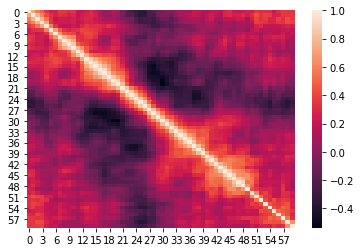

In [14]:
sns.heatmap(dfcor)

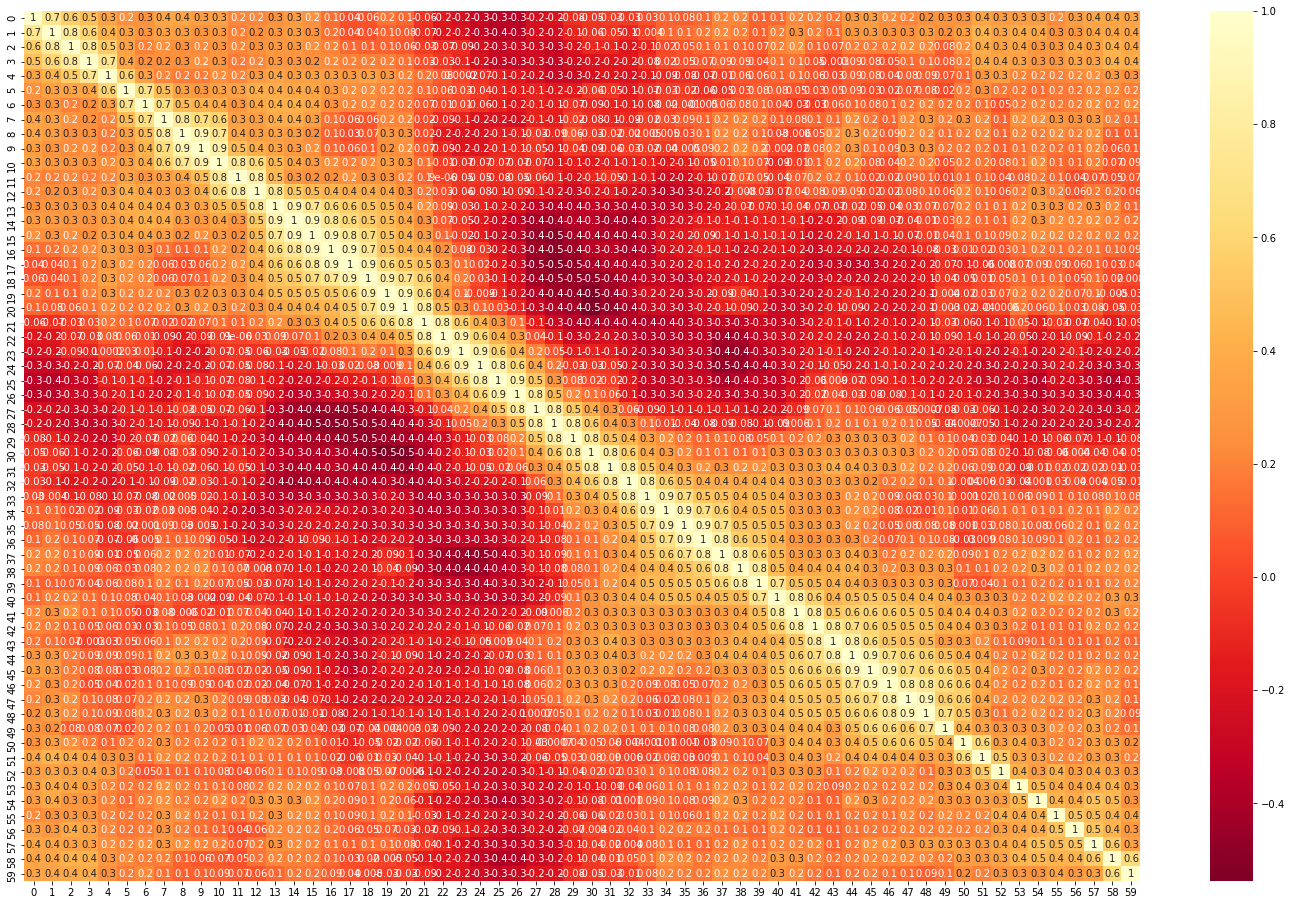

In [15]:
plt.figure(figsize=(25,16))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True , fmt = '.1g')

There are multiple negatively and positively corelated  data variables present in data set

We can use CMAP instead of droping and coulumn

In [16]:

port = {"R":0,"M":1}
df1.iloc[:,-1]= df1.iloc[:,-1].map(port)

In [17]:
df1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [18]:
dfcor1 = df1.corr()
dfcor1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302,0.270482
1,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010,0.231670
2,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256,0.192589
3,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262,0.247935
4,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220,0.224809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.319663,0.282822,0.383945,0.349411,0.218004,0.163433,0.183382,0.266743,0.186347,0.141211,...,0.202905,0.315943,0.358746,0.392768,0.509056,1.000000,0.513086,0.433130,0.295369,0.010152
57,0.368413,0.353061,0.334122,0.345537,0.238749,0.204027,0.242632,0.287568,0.232078,0.212272,...,0.310989,0.371290,0.404345,0.503677,0.465640,0.513086,1.000000,0.550223,0.330400,0.185066
58,0.357611,0.352260,0.425100,0.421410,0.290793,0.220678,0.183279,0.194209,0.096662,0.058260,...,0.300562,0.346915,0.447086,0.454032,0.431902,0.433130,0.550223,1.000000,0.644140,0.132088
59,0.346302,0.359010,0.374256,0.399262,0.255220,0.178027,0.224536,0.147350,0.099233,0.097528,...,0.192609,0.279412,0.286259,0.263791,0.356433,0.295369,0.330400,0.644140,1.000000,0.086982


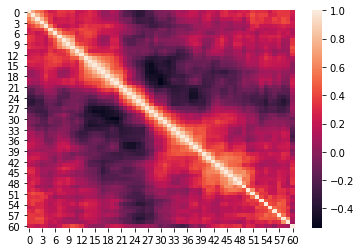

In [19]:
sns.heatmap(dfcor1)

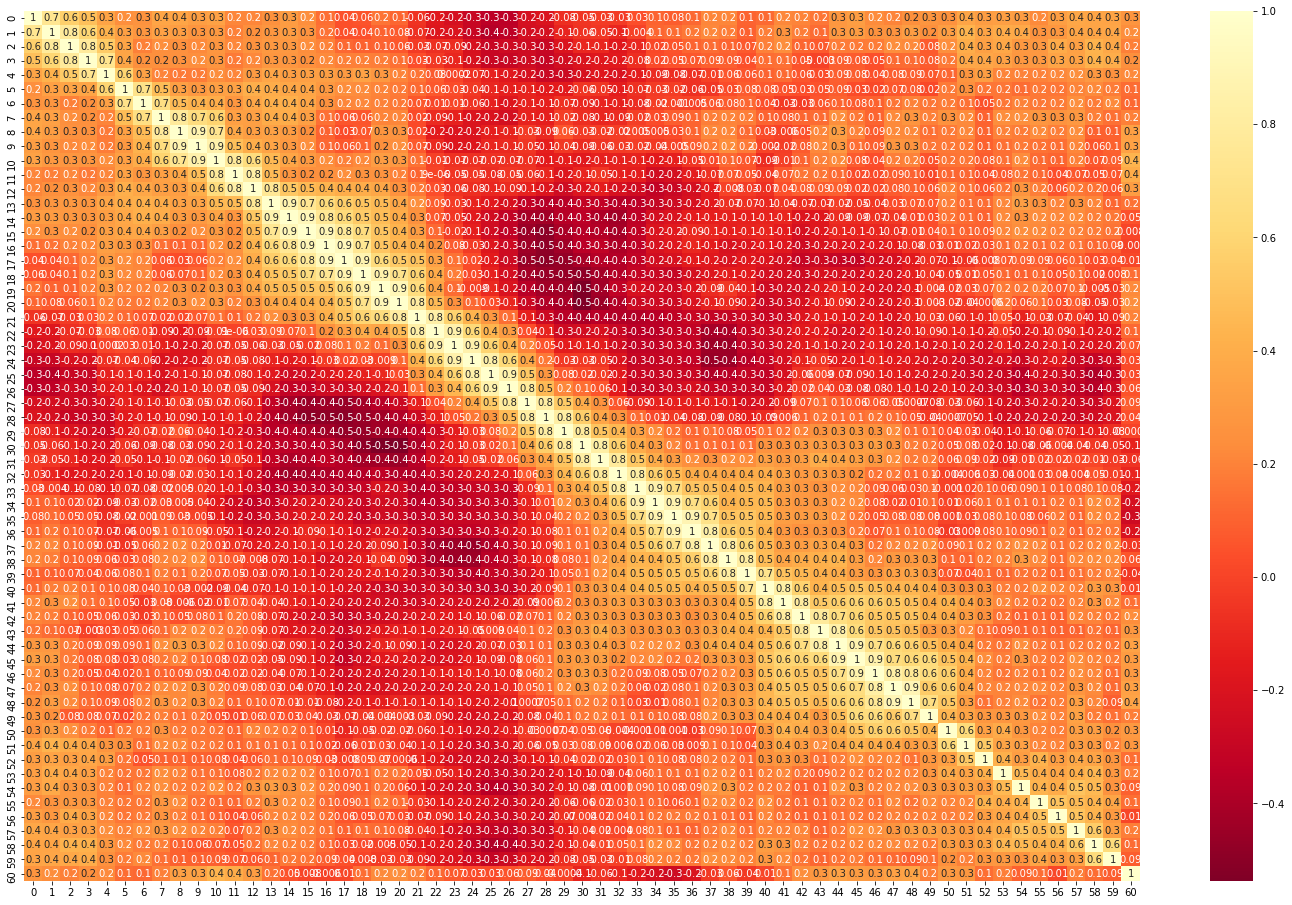

In [20]:
plt.figure(figsize=(25,16))
sns.heatmap(dfcor1,cmap='YlOrRd_r',annot=True , fmt = '.1g')

After changing target variable in numerical form i found that there are only about 3 column which is behaving negatively .

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


Outliers Detection

In [22]:
df1.shape

(207, 61)

In [23]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,0


In [24]:
collist = df1.columns.values
ncol=61
nrows=10


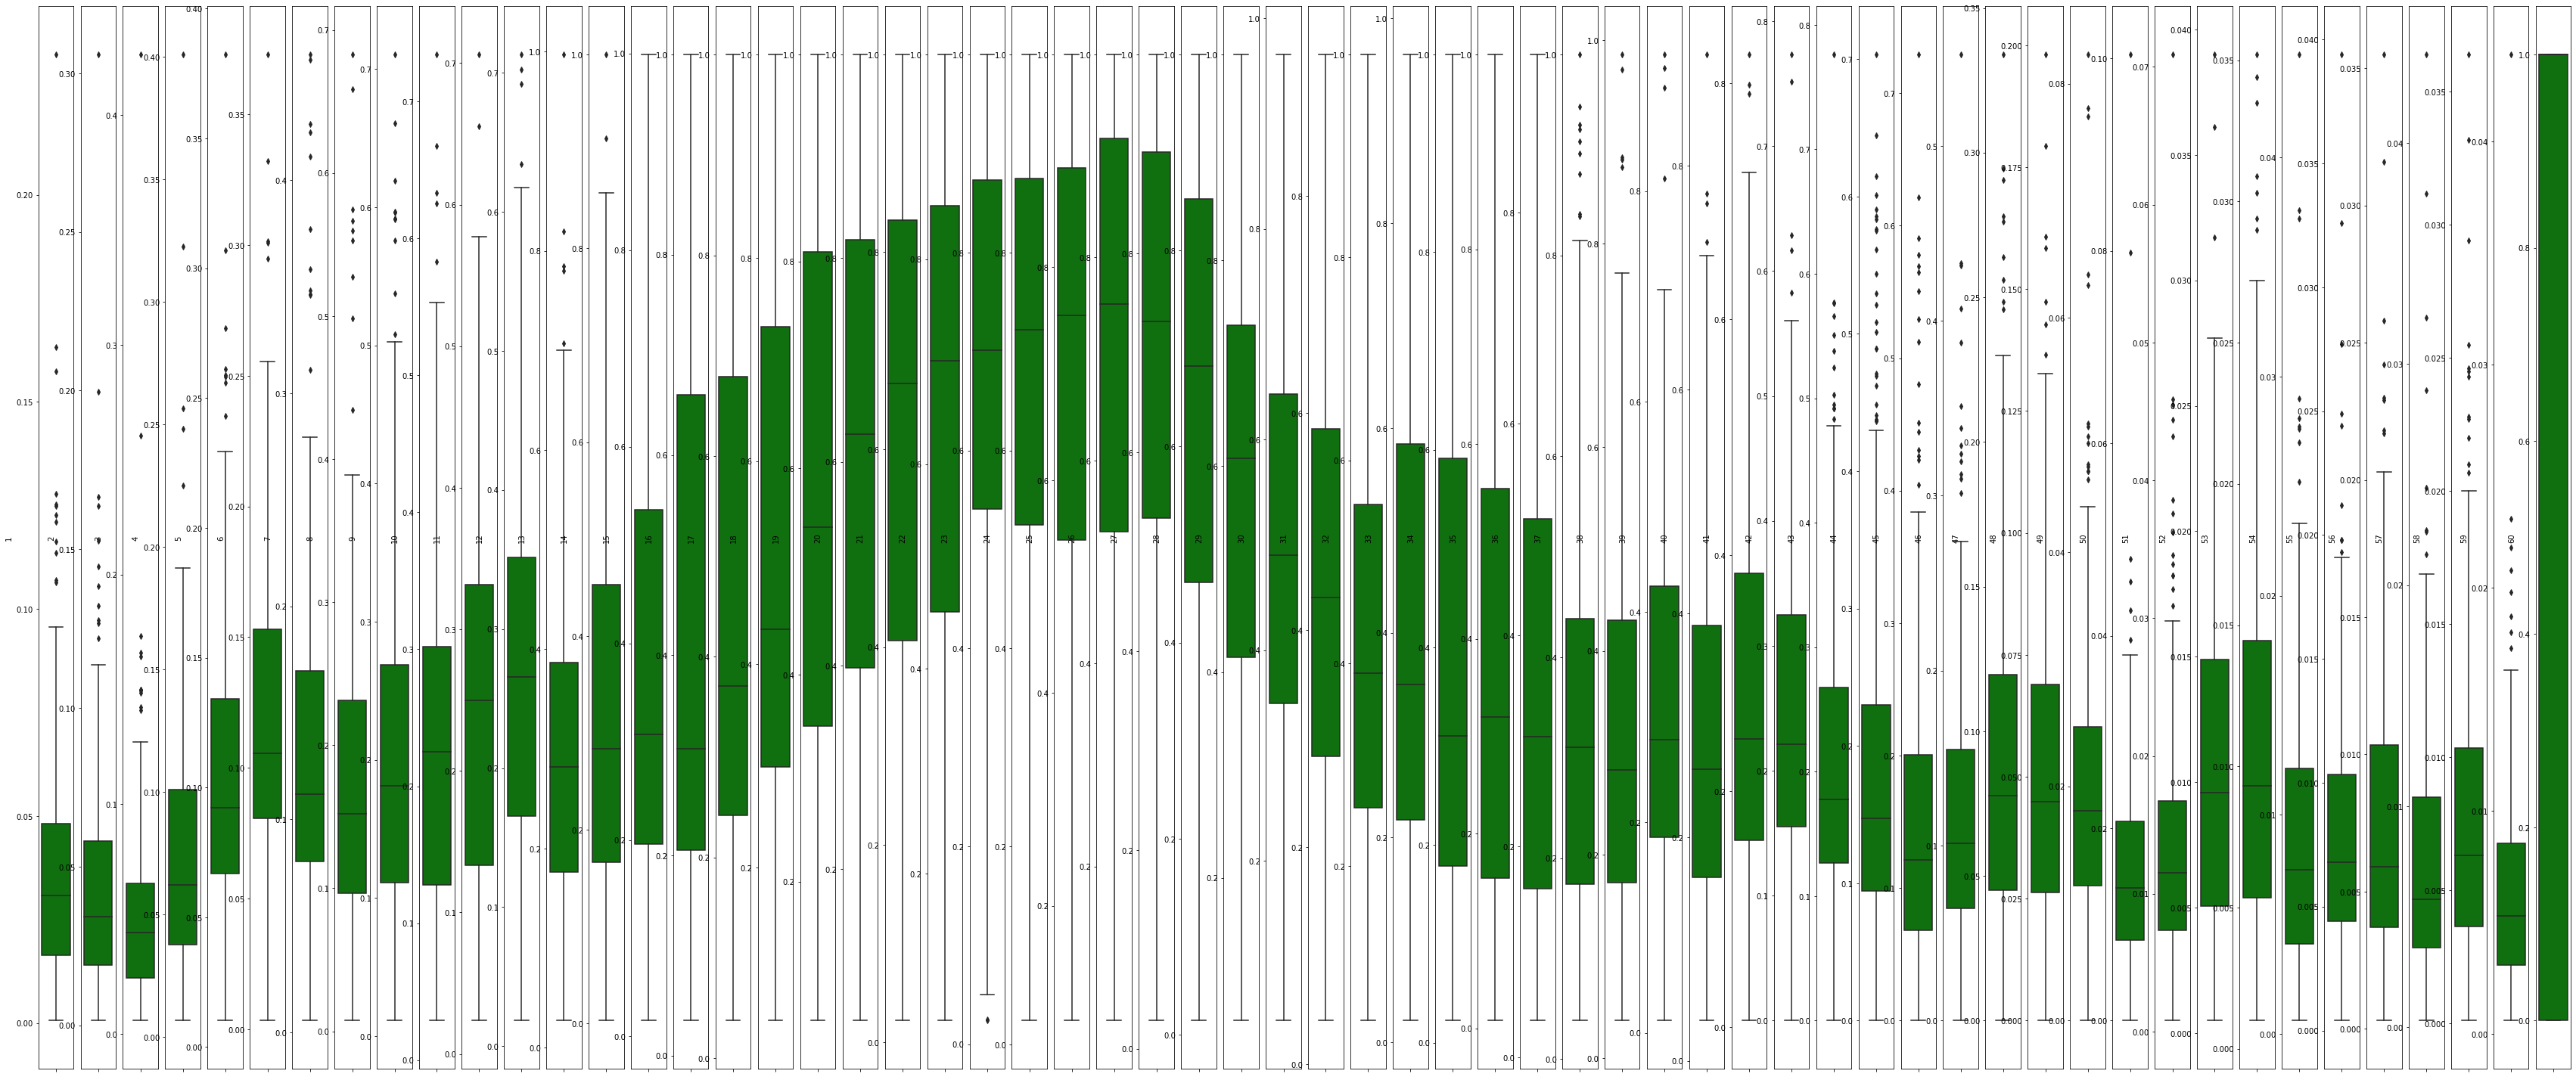

In [25]:
plt.figure(figsize = (ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[collist[i]],color ='green',orient='v')
    

In [26]:
df1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

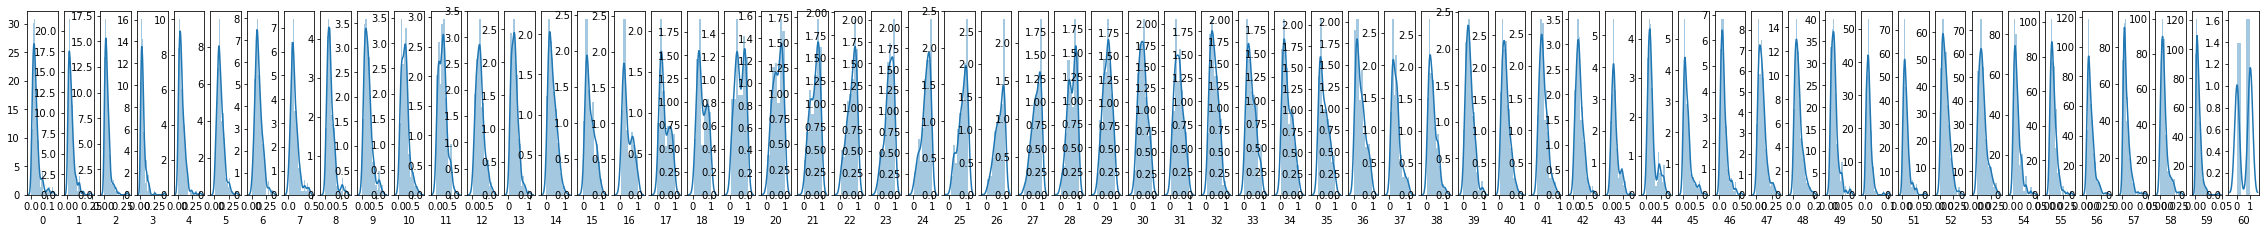

In [27]:
plt.figure(figsize = (40,40))

for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df1[collist[i]])

Kewness is present in almost all variables

# Data Cleaning

In [28]:
df_new= df.iloc[:,0:-1]
df_new.shape


(207, 60)

In [29]:
df_new.head(1)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044


In [30]:
from scipy.stats import zscore
z= np.abs(zscore(df_new))
threshold =3
np.where(z>3)

(array([  1,   1,   1,   1,   2,   2,   4,   4,  18,  18,  19,  20,  21,
         21,  21,  21,  21,  21,  21,  21,  32,  43,  43,  43,  64,  84,
         84,  86,  90,  90,  96,  96,  97,  97,  97,  97,  97,  97, 100,
        100, 104, 110, 110, 110, 111, 126, 126, 126, 128, 128, 128, 130,
        131, 131, 132, 132, 132, 133, 133, 133, 133, 134, 134, 134, 134,
        135, 135, 135, 135, 136, 136, 137, 137, 137, 139, 139, 139, 139,
        139, 140, 140, 141, 141, 141, 142, 142, 142, 143, 144, 144, 145,
        145, 145, 145, 145, 145, 145, 145, 145, 146, 146, 146, 146, 146,
        146, 146, 146, 160, 183, 185, 185, 185], dtype=int64),
 array([ 8,  9, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41, 46,
        47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,  1,
         2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12, 53,
         0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,  8,
        51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 5

In [31]:
m = df_new[(z<3).all(axis=1)]
m

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [32]:
pca = PCA(n_components = 10)

In [33]:
df.shape

(207, 61)

In [34]:
#Percentage Loss of data after removing outliers
percentage_loss=((40)/207)*100
percentage_loss

19.32367149758454

In [35]:
#IQR Method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

0     0.02250
1     0.03170
2     0.03930
3     0.04125
4     0.06335
5     0.06720
6     0.07245
7     0.08945
8     0.13475
9     0.15785
10    0.17360
11    0.19815
12    0.18575
13    0.21085
14    0.28655
15    0.34015
16    0.45455
17    0.43715
18    0.43285
19    0.45900
20    0.42050
21    0.42580
22    0.39700
23    0.33290
24    0.34975
25    0.35025
26    0.38760
27    0.36790
28    0.39105
29    0.32270
30    0.29390
31    0.30160
32    0.29940
33    0.36685
34    0.41285
35    0.39995
36    0.35020
37    0.26450
38    0.25810
39    0.23880
40    0.22505
41    0.22640
42    0.16985
43    0.14080
44    0.13530
45    0.13225
46    0.09055
47    0.07475
48    0.04265
49    0.01360
50    0.01235
51    0.00940
52    0.00985
53    0.00910
54    0.00800
55    0.00595
56    0.00665
57    0.00680
58    0.00670
59    0.00545
dtype: float64


In [36]:
df_new1 = df_new[~((df_new<(Q1-1.5*IQR)) | (df_new > (Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)

(130, 60)


In [37]:
x= df.iloc[:,0:-1]
x.shape


(207, 60)

In [38]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [39]:
#Removing skewness
from sklearn.preprocessing import power_transform
x = power_transform(x,method = 'yeo-johnson')

In [40]:
x.shape

(207, 60)

In [41]:
y = df.iloc[:,60]

y = y.values.reshape(-1,1)

y.shape




(207, 1)

In [42]:
x= pca.fit_transform(x)

In [43]:
x.shape

(207, 10)

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scale = StandardScaler()

In [47]:
x = scale.fit_transform(x)

In [48]:
y=y.reshape(-1,1)
y.shape

(207, 1)

In [49]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size =.22,random_state =45)

In [50]:
y_train.shape

(161, 1)

In [51]:
lr = LogisticRegression()

In [52]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8695652173913043
[[22  2]
 [ 4 18]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.90      0.82      0.86        22

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



In [53]:
gnb = GaussianNB()

In [54]:
gnb.fit(x_train, y_train)
gnb.score(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))


0.8043478260869565
[[23  1]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84        24
           1       0.93      0.64      0.76        22

    accuracy                           0.80        46
   macro avg       0.84      0.80      0.80        46
weighted avg       0.83      0.80      0.80        46



In [55]:
svc = SVC()

In [56]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.9130434782608695
[[23  1]
 [ 3 19]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.95      0.86      0.90        22

    accuracy                           0.91        46
   macro avg       0.92      0.91      0.91        46
weighted avg       0.92      0.91      0.91        46



In [57]:
dt = DecisionTreeClassifier()

In [58]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))


0.8260869565217391
[[20  4]
 [ 4 18]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.82      0.82      0.82        22

    accuracy                           0.83        46
   macro avg       0.83      0.83      0.83        46
weighted avg       0.83      0.83      0.83        46



# CROSS VALIDATION

In [59]:
from sklearn.model_selection import cross_val_score

gnbscores = cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.42857143 0.76190476 0.68292683 0.6097561  0.7804878 ]
0.6527293844367016 0.12747302089141813


In [60]:
svcscores = cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.54761905 0.83333333 0.68292683 0.70731707 0.75609756]
0.705458768873403 0.09417081363593478


In [61]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.57142857 0.71428571 0.68292683 0.68292683 0.6097561 ]
0.6522648083623694 0.053044131662676165


Q- I still not able to understand what is the use of Cross Validation

# Saving The Model

In [69]:
 import joblib

In [70]:
joblib.dump(svc,'svcfile.obj')

['svcfile.obj']

In [71]:
svc_from_joblib = joblib.load('svcfile.obj')

In [72]:
svc_from_joblib.predict(x_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

End Of Project